# Economic Development Project

Preamble: The purpose of this project is to develop a machine learning model that can identify the factors that contribute to the success or failure of economic development projects in Iowa. Once the model is developed, it will be tested for accuracy and interventions developed to increase project success.

In [1]:
### Economic Development Capstone

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import hashlib
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import statistics

%matplotlib inline

pd.options.display.float_format = '{:.2f}'.format #Stop displaying scientific notation

### Load Data:

In [2]:
df_suc = pd.read_csv("edp_closed.csv") #Closed projects
df_can = pd.read_csv("edp_cancelled.csv") #Cancelled projects
df_wip = pd.read_csv("edp_under_contract.csv") #Projects in progress

### Visualize Columns:

#### Succesful Projects

In [3]:
df_suc.head()

,Company Name,County,City,Status,Program,Primary Funding Agreement,Award Date,Total Project Cost,Capital Investment,Direct Assistance Awarded,...,Contracted Jobs - Total,Contracted Qualifying Wage,Verified Total Project Cost,Project Completion Date,Final Jobs - Created,Final Jobs - Retained,Final Jobs - Other Created,Final Jobs - Total,Project Maintenance Date,City Coordinates
0,"DHI Group Inc. (f/k/a Dice Career Solutions, I...",Polk,Urbandale,Closed Contracts - Successful,130% Component,11-130-015,11/18/2010,1750000,1750000,225000,...,106,23.20,5127664.00,11/30/2013,16,90,0,106,11/30/2015,POINT (-93.736522 41.630343)
1,Wacker Chemical Corporation,Monroe,Eddyville,Closed Contracts - Successful,130% Component,12-130-012,11/18/2011,7706860,7706860,150000,...,16,21.36,7746970.00,11/30/2014,3,13,0,16,11/30/2016,POINT (-92.630188 41.158178)
2,"Environmental Lubricants Manufacturing, Inc.",Grundy,Grundy Center,Closed Contracts - Full,Value-Added Agriculture Component,11-VAAC-013,05/19/2011,415000,415000,60000,...,0,0.00,0.00,06/30/2017,0,0,0,0,06/30/2019,POINT (-92.768301 42.361475)
3,McKesson Corporation,Cerro Gordo,Clear Lake,Closed Contracts - Successful,High Quality Jobs Program,15-HQJDF-034,02/20/2015,65242000,65242000,170000,...,164,14.79,70955084.00,02/28/2018,164,0,0,164,02/28/2020,POINT (-93.378746 43.137357)
4,"Peregrine Financial Group, Inc.",Black Hawk,Cedar Falls,Bankruptcy,Community Economic Betterment Account,07-CEBA-044,06/13/2007,13030000,11650000,350000,...,90,21.38,0.00,06/30/2010,0,0,0,0,06/30/2012,POINT (-92.4534 42.537809)


#### Cancelled Projects

In [4]:
df_can.head()

,Company Name,County,City,Status,Program,Primary Funding Agreement,Award Date,Total Project Cost,Capital Investment,Direct Assistance Awarded,...,Projected Jobs - Retained,Projected Jobs - Other,Projected Jobs - Total,Projected Qualifying Wage,Contracted Jobs - Created,Contracted Jobs - Retained,Contracted Jobs - Other Created,Contracted Jobs - Total,Contracted Qualifying Wage,City Coordinates
0,"Solum, Inc.",Story,Ames,Contract Terminated,130% Component,12-130-036,06/22/2012,4940000,2140000,100000,...,0,0,25,21.25,25,0,0,25,21.25,POINT (-93.620181 42.026802)
1,Tactical 8 Technologies LLC,Black Hawk,Cedar Falls,Contract Terminated,100% Component,12-100-008,02/17/2012,435000,75000,45000,...,0,0,15,16.18,15,0,0,15,16.18,POINT (-92.4534 42.537809)
2,"Ralcorp Holdings, Inc.",Linn,Cedar Rapids,Contract Terminated,High Quality Jobs Program,15-HQJTC-062,06/19/2015,10000000,10000000,0,...,33,0,33,23.45,0,33,0,0,23.45,POINT (-91.669808 41.978122)
3,"Siemens Power Generation, Inc.",Lee,Fort Madison,Declined or Rescinded,100% Component,11-100-002,07/15/2010,1350000,0,180000,...,0,0,16,15.63,16,0,0,16,15.63,POINT (-91.313494 40.630024)
4,Hagie Manufacturing Company,Wright,Clarion,Contract Terminated,High Quality Jobs Program,13-HQJDF-036,04/23/2013,22000000,19500000,850000,...,0,0,150,14.55,150,0,0,150,14.55,POINT (-93.732826 42.730761)


#### In-Progress Projects

In [5]:
df_wip.head()

,Company Name,County,City,Status,Program,Primary Funding Agreement,Award Date,Total Project Cost,Capital Investment,Direct Assistance Awarded,...,Project Completion Jobs - Total,Verified Total Project Cost,Project Completion Date,Reported Jobs - Created,Reported Jobs - Retained,Reported Jobs - Other Created,Reported Jobs - Total,Date Reported,Project Maintenance Date,City Coordinates
0,"Siculus, Inc.",Polk,Altoona,Performance Period,High Quality Jobs Program,19-HQJTC-025,05/17/2019,400000000,400000000,0,...,0,0.00,05/31/2022,0,0,0,0,06/30/2020,05/31/2024,POINT (-93.464609 41.64404)
1,INTL FCStone Inc.,Polk,West Des Moines,Maintenance Period,High Quality Jobs Program,16-HQJDF-027,12/18/2015,3000000,1400000,200000,...,26,19423489.00,12/31/2018,0,0,0,0,06/30/2020,12/31/2020,POINT (-93.713031 41.575505)
2,GELITA USA Inc.,Woodbury,Sergeant Bluff,Performance Period,High Quality Jobs Program,17-HQJDF-023,11/18/2016,22095000,22065000,105000,...,0,0.00,11/30/2019,0,0,0,0,06/30/2020,11/30/2021,POINT (-96.363068 42.400299)
3,"Express Logistics, Inc.",Dallas,Waukee,Performance Period,High Quality Jobs Program,15-HQJDF-004,08/22/2014,1158300,1128300,130000,...,0,0.00,11/30/2019,0,0,0,0,06/30/2020,11/30/2021,POINT (-93.885632 41.611984)
4,"Worley Warehousing, Inc.",Linn,Cedar Rapids,Performance Period,High Quality Jobs Program,20-HQJTC-011,11/22/2019,8339000,3850000,0,...,0,0.00,11/30/2022,0,0,0,0,06/30/2020,11/30/2024,POINT (-91.669808 41.978122)


Note that there are different data sources for each item. Cancelled projects have 34 columns. Successful projects have 29. Projects still in progress also have 34.

### Clean up Columns

In [6]:
#print(df_suc.columns)
#print(df_can.columns)
#print(df_wip.columns)

In [7]:
#Successful Projects
df_suc.rename({'Company Name': 'company', 'County': 'county', 'City':'city', 'Status': 'status', 'Program':'program', 'Primary Funding Agreement':'primary_funding',
              'Award Date':'award_date', 'Total Project Cost':'tot_project_cost', 'Capital Investment':'capital_investment',
              'Direct Assistance Awarded':'direct_assistance_awarded','Tax Benefits Awarded':'tax_benefits_awarded',
              'Projected Jobs - Created':'p_jobs_created', 'Projected Jobs - Retained':'p_jobs_retained', 'Projected Jobs - Other': 'p_jobs_other', 'Projected Jobs - Total': 'p_jobs_total',
              'Projected Qualifying Wage': 'p_qualwage', 'Contracted Jobs - Created':'cont_jobs_created',
              'Contracted Jobs - Retained':'cont_jobs_retained', 'Contracted Jobs - Other Created':'cont_jobs_othercreated',
              'Contracted Jobs - Total':'cont_jobs_total', 'Contracted Qualifying Wage':'cont_qualwage',
              'Verified Total Project Cost':'verified_total_project_cost', 'Project Completion Date':'project_completion_date',
              'Final Jobs - Created':'final_jobs_created', 'Final Jobs - Retained':'final_jobs_retained',
              'Final Jobs - Other Created':'final_jobs_other_created', 'Final Jobs - Total':'final_jobs_total',
              'Project Maintenance Date':'project_maintenance_date', 'City Coordinates':'city_coordinates'}, axis=1, inplace=True)
#print(df_suc.columns)

In [8]:
#Cancelled/Failured Projects
df_can.rename({'Company Name': 'company', 'County': 'county', 'City':'city', 'Status': 'status', 'Program':'program', 'Primary Funding Agreement':'primary_funding',
              'Award Date':'award_date', 'Total Project Cost':'tot_project_cost', 'Capital Investment':'capital_investment',
              'Direct Assistance Awarded':'direct_assistance_awarded','Tax Benefits Awarded':'tax_benefits_awarded',
              'Projected Jobs - Created':'p_jobs_created', 'Projected Jobs - Retained':'p_jobs_retained', 'Projected Jobs - Other': 'p_jobs_other', 'Projected Jobs - Total': 'p_jobs_total',
              'Projected Qualifying Wage': 'p_qualwage', 'Contracted Jobs - Created':'cont_jobs_created',
              'Contracted Jobs - Retained':'cont_jobs_retained', 'Contracted Jobs - Other Created':'cont_jobs_othercreated',
              'Contracted Jobs - Total':'cont_jobs_total', 'Contracted Qualifying Wage':'cont_qualwage',
              #'Verified Total Project Cost':'verified_total_project_cost', 'Project Completion Date':'project_completion_date',
              #'Final Jobs - Created':'final_jobs_created', 'Final Jobs - Retained':'final_jobs_retained',
              #'Final Jobs - Other Created':'final_jobs_other_created', 'Final Jobs - Total':'final_jobs_total',
              #'Project Maintenance Date':'project_maintenance_date',
            'City Coordinates':'city_coordinates'}, axis=1, inplace=True)

In [9]:
#In-Progress Projects
#Note contacted qualifying wage instead of contracted
df_wip.rename({'Company Name': 'company', 'County': 'county', 'City':'city', 'Status': 'status', 'Program':'program', 'Primary Funding Agreement':'primary_funding',
              'Award Date':'award_date', 'Total Project Cost':'tot_project_cost', 'Capital Investment':'capital_investment',
              'Direct Assistance Awarded':'direct_assistance_awarded','Tax Benefits Awarded':'tax_benefits_awarded',
              'Projected Jobs - Created':'p_jobs_created', 'Projected Jobs - Retained':'p_jobs_retained', 'Projected Jobs - Other': 'p_jobs_other',
              'Projected Jobs - Total': 'p_jobs_total',
              'Projected Qualifying Wage': 'p_qualwage', 'Contracted Jobs - Created':'cont_jobs_created',
              'Contracted Jobs - Retained':'cont_jobs_retained', 'Contracted Jobs - Other Created':'cont_jobs_othercreated',
              'Contracted Jobs - Total':'cont_jobs_total', 'Contacted Qualifying Wage':'cont_qualwage',
              'Verified Total Project Cost':'verified_total_project_cost', 'Project Completion Date':'project_completion_date',
              'Final Jobs - Created':'final_jobs_created', 'Final Jobs - Retained':'final_jobs_retained',
              'Final Jobs - Other Created':'final_jobs_other_created', 'Final Jobs - Total':'final_jobs_total',
              'Project Maintenance Date':'project_maintenance_date', 'City Coordinates':'city_coordinates',
              'Date Reported':'date_reported',
              'Project Completion Jobs - Created':'end_of_project_completion_jobs_created',
                'Project Completion Jobs - Retained':'end_of_project_completion_jobs_retained',
                'Project Completion Jobs - Other Created':'end_of_project_completion_jobs_others_created',
                'Project Completion Jobs - Total':'end_of_project_completion_jobs_total',
                'Reported Jobs - Created':'reported_jobs_created',
                'Reported Jobs - Retained':'reported_jobs_retained',
                'Reported Jobs - Other Created':'reported_jobs_others_created',
                'Reported Jobs - Total':'reported_jobs_total',
}, axis=1, inplace=True)
#print(df_wip.columns)

### Adding New Columns

In [10]:
#Dropping columns
#df_suc.drop(columns='success', inplace=True)
#df_can.drop(columns='cancelled', inplace=True)
#df_wip.drop(columns='in_progress', inplace=True)

In [11]:
# Adding new columns
df_suc['project_type'] = '2' #Success = 2
df_can['project_type'] = '0' #Cancelled = 0
df_wip['project_type'] = '1' #WIP = 1

### Merging Columns Together
We now merge the 3 columns with their corrected names into one dataframe. We have 41 columns (39 plus one Y/N for the type of project - successfully completed, cancelled or in progress) and 619 rows of data.

In [12]:
df = pd.concat([df_suc, df_can, df_wip]).copy() #Merge the 3 dataframes together
#print(df.values.base is df2.values.base)
print(df.columns) #Looking for duplicates

Index(['company', 'county', 'city', 'status', 'program', 'primary_funding',
       'award_date', 'tot_project_cost', 'capital_investment',
       'direct_assistance_awarded', 'tax_benefits_awarded', 'p_jobs_created',
       'p_jobs_retained', 'p_jobs_other', 'p_jobs_total', 'p_qualwage',
       'cont_jobs_created', 'cont_jobs_retained', 'cont_jobs_othercreated',
       'cont_jobs_total', 'cont_qualwage', 'verified_total_project_cost',
       'project_completion_date', 'final_jobs_created', 'final_jobs_retained',
       'final_jobs_other_created', 'final_jobs_total',
       'project_maintenance_date', 'city_coordinates', 'project_type',
       'end_of_project_completion_jobs_created',
       'end_of_project_completion_jobs_retained',
       'end_of_project_completion_jobs_others_created',
       'end_of_project_completion_jobs_total', 'reported_jobs_created',
       'reported_jobs_retained', 'reported_jobs_others_created',
       'reported_jobs_total', 'date_reported'],
      dtype='obj

# Exploratory Data Analysis

In [13]:
print((df['direct_assistance_awarded'].describe()))

count       619.00
mean     200176.81
std      486738.05
min           0.00
25%           0.00
50%           0.00
75%      200000.00
max     5000000.00
Name: direct_assistance_awarded, dtype: float64


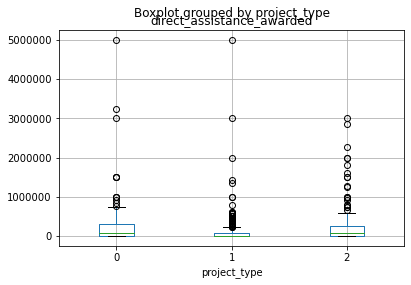

In [14]:
 # Creating plot
fig, ax = plt.subplots()
plt.suptitle('')
df.boxplot(column=['direct_assistance_awarded'], by='project_type', ax=ax)

#Turn off scientific notation
plt.ticklabel_format(style='plain', axis='y')

#Show plot
#plt.show() #Note with %matplotlib inline don't need this

#df.boxplot(by =['project_type'], column =['direct_assistance_awarded'])

We see that there are a large number of 0 values in the dataset. This might be because many companies are provided tax incentives instead of direct cash assistance. Let's create a "total assistance awarded" which is the sum of the direct and tax columns.

In [15]:
df['total_assistance'] = (df['direct_assistance_awarded'] + df['tax_benefits_awarded'])

Let's create a new plot looking at total_assistance created, and maybe a barchart showing the percentage of aid as a form of tax and direct assistance.

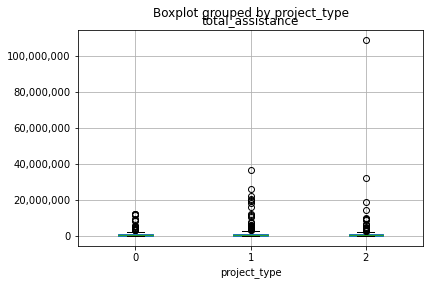

In [16]:
# Creating plot
fig, ax = plt.subplots()
plt.suptitle('')
df.boxplot(column=['total_assistance'], by='project_type', ax=ax)

plt.ticklabel_format(style='plain', axis='y') #Turn off scientiifc notation
ticks_loc = ax.get_yticks().tolist()#to remove warning about Fixed Locator
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc)) #to remove warning about Fixed Locator
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()]); #set ticks to 100,000
#note that the semicolon above stops Jupyter from printing out the returned list value

#Show plot
#plt.show() #Matplotlib inline up top, don't need this line


Whoops. An enormous outlier of 109 million! Let's take a look at that.

In [17]:
df_temp = df[df.total_assistance > 40000000]
print(df_temp.iloc[0])

company                                            Iowa Fertilizer Company LLC
county                                                                     Lee
city                                                                     Wever
status                                           Closed Contracts - Successful
program                                                         130% Component
primary_funding                                                     12-130-021
award_date                                                          02/17/2012
tot_project_cost                                                    1750000000
capital_investment                                                  1300000000
direct_assistance_awarded                                              1610000
tax_benefits_awarded                                                 107500000
p_jobs_created                                                             159
p_jobs_retained                                     

So, it's a real project. And it got some criticism: https://www.desmoinesregister.com/story/money/2017/04/20/iowas-new-3-b-fertilizer-plant-worth-110-m-state-subsidies/305508001/ But it's in the success column, so that's good news.

Let's remove that outlier (just temporarily) and plot it.

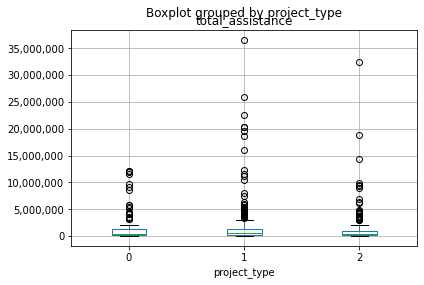

In [18]:
# Creating plot
fig, ax = plt.subplots()
plt.suptitle('')

df_temp = df[df.total_assistance < 40000000]
df_temp.boxplot(column=['total_assistance'], by='project_type', ax=ax)

plt.ticklabel_format(style='plain', axis='y') #Turn off scientiifc notation
ticks_loc = ax.get_yticks().tolist()#to remove warning about Fixed Locator
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc)) #to remove warning about Fixed Locator
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()]); #set ticks to 100,000
#Note that the semicolon prevents Jupyter from printing out the tick labels

#Show plot
#plt.show() #Matplotlib inline up top, don't need this

Still a lot of values way above our boxplot. Let's move on. We want to know what factors are relevant to the success of economic development projects. For that reason, we'll use the companies in the project_type = 2 (success) as the basis for success, project_type = 0 as the basis for failure, and the works in progress (project_type = 1) for prediction and evaluation of the model.

In [19]:
print('Projects by Type')
print(df.project_type.value_counts()) #2 = Success, 1 = WIP, 0 = Failure

Projects by Type
1    260
2    242
0    117
Name: project_type, dtype: int64


## Create an ID Column
Before we go any further we need to create a test set of data to work on. We've got a good sense of the columns without getting too deep into our EDA. We'll create a unique identifier for each item in the dataset.

In [20]:
df = df.copy() #create copy of df
df['ID'] = '' #add new column
temp_index = 0
for x in df:
    #Create a string made up of Company + Award date (as a primary key)
    temp_str = str(df['company'].iloc[temp_index] + df['award_date'].iloc[temp_index]).encode('utf-8')
    #Turn that string into a hash
    temp_hash = hashlib.md5(temp_str).hexdigest()
    df['ID'].iloc[temp_index] = temp_hash
    #Increment the loop
    temp_index = temp_index + 1

C:\Users\Dustin MacDonald\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## Create a Test Set

Now we can create our test set. The purpose of creating the unique identiifer for each item is so that we can add items that, alphabetically might show up in the middle of the list, without affecting our test set.

In [21]:
#Create our X and y columns
X = df.copy()
X = X.drop(columns='project_type')
y = df['project_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#Remember to always work on the train set

In [22]:
df_copy = X_train.copy()

<AxesSubplot:xlabel='total_assistance', ylabel='final_jobs_total'>

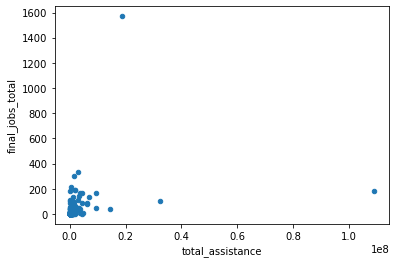

In [23]:
df_copy.plot(kind="scatter", x="total_assistance", y ="final_jobs_total")

Let's make a correlation matrix and look at it:

In [24]:
corr_matrix = df_copy.corr()
print(corr_matrix["final_jobs_total"].sort_values(ascending=False))

final_jobs_total                                 1.00
cont_jobs_total                                  0.98
p_jobs_total                                     0.97
cont_jobs_created                                0.95
final_jobs_created                               0.93
final_jobs_other_created                         0.91
p_jobs_created                                   0.89
p_jobs_other                                     0.87
total_assistance                                 0.26
tax_benefits_awarded                             0.25
cont_jobs_retained                               0.19
final_jobs_retained                              0.19
p_jobs_retained                                  0.18
direct_assistance_awarded                        0.17
tot_project_cost                                 0.17
capital_investment                               0.16
verified_total_project_cost                      0.14
cont_jobs_othercreated                           0.09
p_qualwage                  

Jobs seem very highly correlated. What about costs?

In [25]:
print(corr_matrix["tot_project_cost"].sort_values(ascending=False))

tot_project_cost                                 1.00
capital_investment                               0.98
tax_benefits_awarded                             0.82
total_assistance                                 0.82
verified_total_project_cost                      0.78
final_jobs_created                               0.27
p_jobs_created                                   0.18
final_jobs_total                                 0.17
cont_jobs_total                                  0.16
direct_assistance_awarded                        0.16
p_jobs_total                                     0.16
cont_jobs_created                                0.14
p_qualwage                                       0.10
cont_qualwage                                    0.10
cont_jobs_retained                               0.09
p_jobs_retained                                  0.09
p_jobs_other                                     0.06
cont_jobs_othercreated                           0.05
final_jobs_other_created    

Total cost correlates highly with benefits but only weakly with jobs created and direct asssitance. In fact, it seems a lot more tax benefits are likely awarded than direct assistance. Let's look at that.

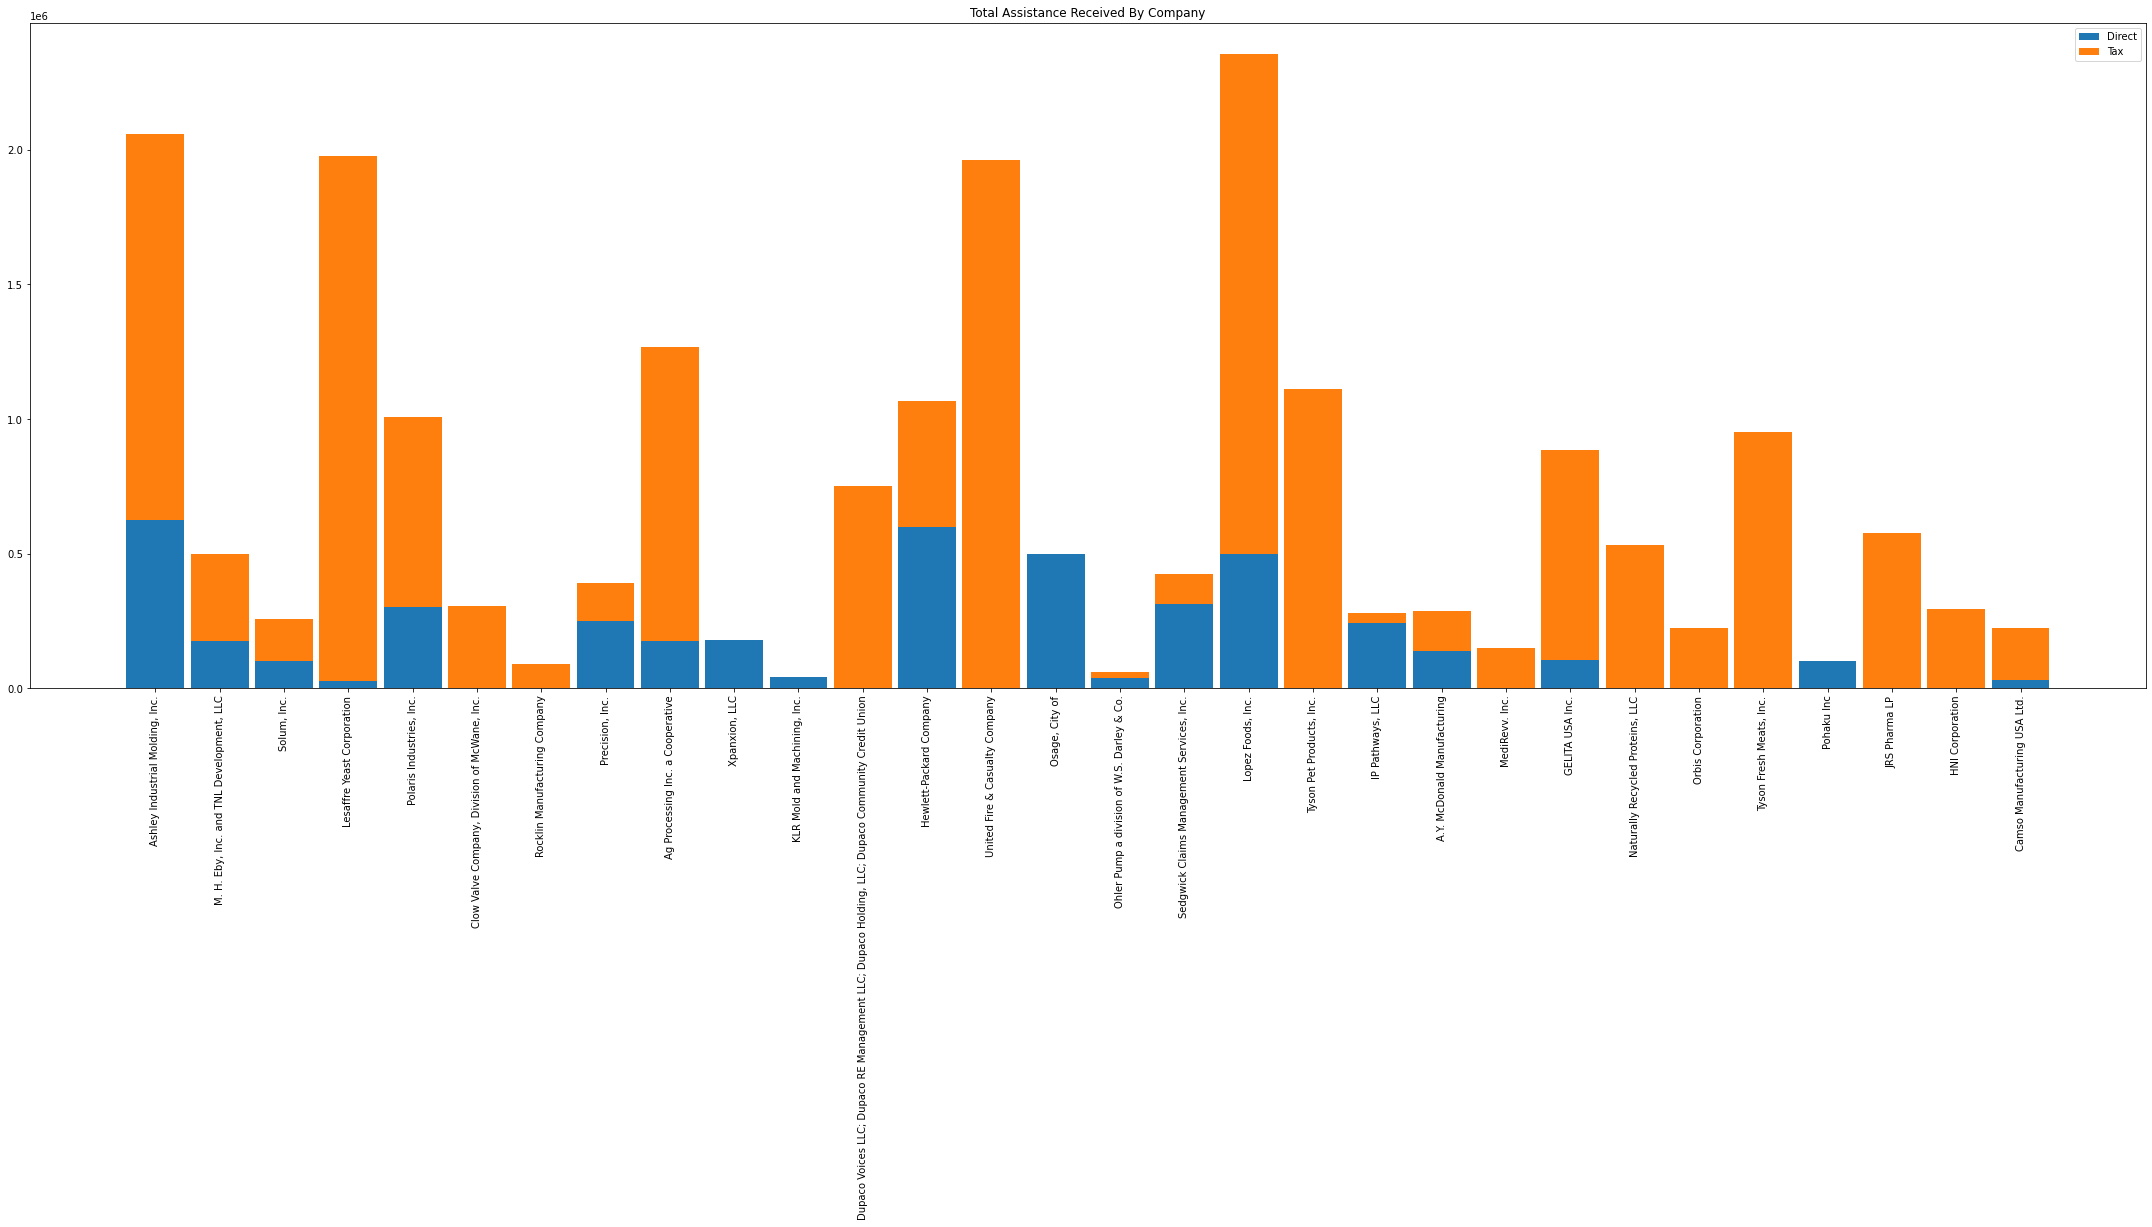

In [26]:
df_copy2 = df_copy.head(30)

fig, ax = plt.subplots(figsize=[30,10])
width = 0.9 #width of bars
ax.bar(df_copy2["company"], df_copy2["direct_assistance_awarded"], width, label='Direct')
ax.bar(df_copy2["company"], df_copy2["tax_benefits_awarded"], width, bottom=df_copy2["direct_assistance_awarded"],
       label='Tax')
ax.set_title('Total Assistance Received By Company')
ax.legend()
plt.tight_layout()
plt.xticks(rotation='vertical'); #Note semicolon to stop Jupyter from printing text
#plt.show() #Not necessary because of %matplotlib inline above

So we can see that even from this small sample size that the majority of aid that companies receive is in the form of tax incentives (orange bar) rather than direct assistance (blue bar). The exact company names in this small sample are not super relevant so I'm not concerned that they are in tiny print above.

## Hypothesis Development

Let's develop our hypotheses.

1. The higher the amount of capital investment relative to the total project cost, the more likely the project will be to succeed (H1)
2. The more jobs to be retained relative to the total number of jobs, the more likely the project will be to succeed (H2)
3. ~~The closer to the final budget the project is, the more likely the project will be to succeed~~ (H3)

H3 will not be tested because we lack sufficient data.

After we test these hypotheses on our existing data, we will attempt a Random Forest classification model.

## Testing Ideas

In order to test Hypothesis 1, we will look at each project's amount of capital investment (capital_investment) as a percentage of total project cost (tot_project_cost) for projects that succeeded or were terminated. We will compare the means using the two-tailed t-test.

**Hypothesis 1**
   
H0 - There will be no difference between the amount of capital investment in projects that succeed or not.

H1 - Projects that succeed will have a larger percentage of their total assistance as capital assistance.



In [27]:
#Create new dataframe with just the fields we need
h1_df = df.copy()
h1_df = h1_df[['tot_project_cost','capital_investment', 'project_type']]

Now we need a percentage of capital investment against total cost to use.

In [28]:
h1_df['percent_cap'] = (h1_df['capital_investment'] / h1_df['tot_project_cost'])

#Note when I went to run the hypothesis later, I got an error that I couldn't run it on strings. I think my percent_cap
#is actually a string.

#print(h1_df.dtypes) #percent_cap is float, weird.
#I figured this out. I was not running inplace=True.

#while we're here, let's drop capital investment and total project cost
h1_df = h1_df[['percent_cap', 'project_type']]
print(h1_df.head()) #Just confirming we have two rows

   percent_cap project_type
0         1.00            2
1         1.00            2
2         1.00            2
3         1.00            2
4         0.89            2


Interesting that we have some projects that have 100% capital investment. Are tax incentives not captured in the total project cost? I'll want to revisit that.

In [29]:
#Next we need to split the df into our success and fail groups
#gapminder_2002 = gapminder[gapminder['year']==2002]

h1_df_success = h1_df.copy()
h1_df_failure = h1_df.copy()

In [30]:
h1_df_success = h1_df[h1_df['project_type']=='2'] #Filter by success and failure
h1_df_failure = h1_df[h1_df['project_type']=='0']
h1_df_success = h1_df_success.dropna() #Drop missing values - make sure to revisit
h1_df_failure = h1_df_failure.dropna()

In [31]:
h1_df_success = h1_df_success.drop(columns='project_type') #Drop project type
h1_df_failure = h1_df_failure.drop(columns='project_type') #Success!

## Testing Variance

In [32]:
print(h1_df_success.shape)
print(h1_df_failure.shape)

# Testing Variance of Each Group
var1 = np.var(h1_df_success) #Var1 is the bigger group
var2 = np.var(h1_df_failure)

print('Ratio Between Groups is =' + str(var1 / var2))

#Because ratio is 0.84 (less than 4), we can assume population variance is equal

(242, 1)
(116, 1)
Ratio Between Groups is =percent_cap   0.84
dtype: float64


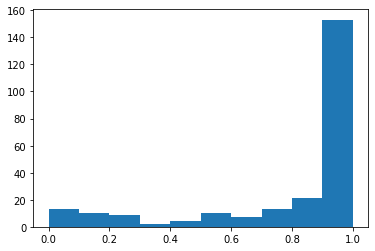

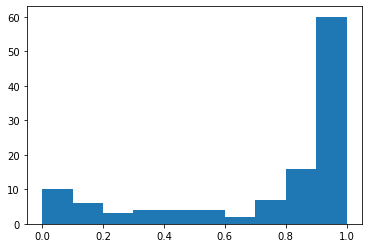

In [33]:
# Check normality
plt.hist(h1_df_success['percent_cap'])
plt.show()

plt.hist(h1_df_failure['percent_cap'])
plt.show()

#h1_df_success.drop(columns=['log_value'])
#h1_df_failure.drop(columns=['log_value'])


## Two Sample T-Test

In [34]:
#perform two sample t-test with equal variances
print(h1_df_success.dtypes)
print(h1_df_success.shape)
print(h1_df_failure.dtypes)
print(h1_df_failure.shape)

print('Success Mean: ' + str(statistics.mean(h1_df_success['percent_cap'])))
print('Failure Mean: ' + str(statistics.mean(h1_df_failure['percent_cap'])))

percent_cap    float64
dtype: object
(242, 1)
percent_cap    float64
dtype: object
(116, 1)
Success Mean: 0.8068825103660526
Failure Mean: 0.7468852043280245


In [35]:
stats.ttest_ind(a=h1_df_success, b=h1_df_failure, equal_var=True, nan_policy='omit')
#Note, I need to count NaNs before I keep going, I added nan_policy to skip them but I might need to remove them
#Update: turns out failure has NaNs in it, they have been removed

Ttest_indResult(statistic=array([1.70962482]), pvalue=array([0.08820666]))

## Interpreting the T-Test Results

Test Statistic: 1.70962482

p-value = 0.08820666

Because the p-value is above our alpha value 0.05, we fail to reject the null hypothesis.

## Hypothesis 2

The more jobs to be retained relative to the total number of jobs, the more likely the project will be to succeed (H2)

**Hypothesis 2**
   
H0 - There will be no difference between the percentage of retained jobs vs total jobs in projects that succeed or not.

H1 - Projects that succeed will have a larger percentage of retained vs total jobs than in other projects.


In [36]:
#Create new dataframe with just the fields we need
h2_df = df.copy()
h2_df = h2_df[['p_jobs_retained','p_jobs_total', 'project_type']]
h2_df['percent_jobs'] = (h2_df['p_jobs_retained'] / h2_df['p_jobs_total'])
h2_df = h2_df[['percent_jobs', 'project_type']]

#Next we need to split the df into our success and fail groups

h2_df_success = h2_df.copy()
h2_df_failure = h2_df.copy()

h2_df_success = h2_df[h2_df['project_type']=='2'] #Filter by success and failure
h2_df_failure = h2_df[h2_df['project_type']=='0']

print(isinstance(h2_df_failure, pd.DataFrame)) #Check if it's a df

h2_df_success = h2_df_success.dropna() #Drop missing values - make sure to revisit
h2_df_failure = h2_df_failure.dropna()

print(h2_df_success.shape)
print(h2_df_failure.shape)

print(h2_df_failure.head()) #Just confirming we have two rows

True
(224, 2)
(111, 2)
   percent_jobs project_type
0          0.00            0
1          0.00            0
2          1.00            0
3          0.00            0
4          0.00            0


In [37]:
# Testing Variance of Each Group
var1_h2 = np.var(h2_df_success['percent_jobs']) #Var1 is the bigger group
var2_h2 = np.var(h2_df_failure['percent_jobs'])

print(h2_df_failure['percent_jobs'])
print(var1_h2)
print(var2_h2)

print('Ratio Between Groups is =' + str(var1_h2 / var2_h2))

#Because ratio is 1.13 (less than 4), we can assume population variance is equal

0     0.00
1     0.00
2     1.00
3     0.00
4     0.00
      ... 
112   0.00
113   0.00
114   0.00
115   0.00
116   0.00
Name: percent_jobs, Length: 111, dtype: float64
0.07249188363883853
0.06437144369965743
Ratio Between Groups is =1.1261497252892017


In [38]:
#perform two sample t-test with equal variances
print(h2_df_success.dtypes)
print(h2_df_success.shape)
print(h2_df_failure.dtypes)
print(h2_df_failure.shape)

print('Success Mean: ' + str(statistics.mean(h2_df_success['percent_jobs'])))
print('Failure Mean: ' + str(statistics.mean(h2_df_failure['percent_jobs'])))

percent_jobs    float64
project_type     object
dtype: object
(224, 2)
percent_jobs    float64
project_type     object
dtype: object
(111, 2)
Success Mean: 0.11588431765003394
Failure Mean: 0.08948986968796589


In [39]:
h2_df_success.drop(columns=['project_type'], inplace=True)
h2_df_failure.drop(columns=['project_type'], inplace=True)

h2_df_success.info()
h2_df_failure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 0 to 241
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   percent_jobs  224 non-null    float64
dtypes: float64(1)
memory usage: 3.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 116
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   percent_jobs  111 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


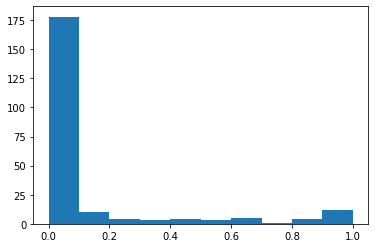

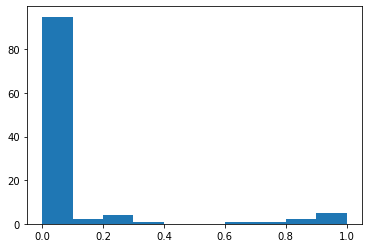

In [40]:
# Check normality
plt.hist(h2_df_success)
plt.show()

plt.hist(h2_df_failure)
plt.show()

In [41]:
stats.ttest_ind(a=h2_df_success, b=h2_df_failure, equal_var=True, nan_policy='omit')
#Note, I need to count NaNs before I keep going, I added nan_policy to skip them but I might need to remove them

Ttest_indResult(statistic=array([0.85811176]), pvalue=array([0.39144796]))

Test Statistic: 0.85811176

p-value = 0.39144796

Because the p-value is below our alpha value 0.05, we reject the null hypothesis.

Projects that succeed have a larger percentage of retained vs total jobs than projects that do not.

## Hypothesis 3

Hypothesis 3 was going to be that the closer to the final budget the project is, the more likely the project will be to succeed, but unfortunately IEDA does not collect final budget data for projects that do not proceed.

## Decision Tree

In [42]:
#Create our X and y columns
X = df.copy()
X = X.drop(columns='project_type')
y = df['project_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#Remember to always work on the train set

In [43]:
from sklearn.tree import DecisionTreeClassifier

#Create classifier and fit to data
tree_clf = DecisionTreeClassifier()

#create a copy of our df
df_dt_train = X_train.copy()
df_dt_test = X_test.copy()

# create an object of the OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [44]:
#drop columns with missing values (mostly columns that are only present on completed projects)
df_dt_train.drop(columns=['verified_total_project_cost', 'project_completion_date', 'final_jobs_created',
                 'final_jobs_retained', 'final_jobs_other_created', 'final_jobs_total',
                 'project_maintenance_date', 'end_of_project_completion_jobs_created',
                 'end_of_project_completion_jobs_retained',
                'end_of_project_completion_jobs_others_created',
                'end_of_project_completion_jobs_total', 'reported_jobs_created',
                'reported_jobs_retained', 'reported_jobs_others_created', 'reported_jobs_total',
                'date_reported'], inplace=True)

df_dt_test.drop(columns=['verified_total_project_cost', 'project_completion_date', 'final_jobs_created',
                 'final_jobs_retained', 'final_jobs_other_created', 'final_jobs_total',
                 'project_maintenance_date', 'end_of_project_completion_jobs_created',
                 'end_of_project_completion_jobs_retained',
                'end_of_project_completion_jobs_others_created',
                'end_of_project_completion_jobs_total', 'reported_jobs_created',
                'reported_jobs_retained', 'reported_jobs_others_created', 'reported_jobs_total',
                'date_reported'], inplace=True)

y_train.drop(columns=['verified_total_project_cost', 'project_completion_date', 'final_jobs_created',
                 'final_jobs_retained', 'final_jobs_other_created', 'final_jobs_total',
                 'project_maintenance_date', 'end_of_project_completion_jobs_created',
                 'end_of_project_completion_jobs_retained',
                'end_of_project_completion_jobs_others_created',
                'end_of_project_completion_jobs_total', 'reported_jobs_created',
                'reported_jobs_retained', 'reported_jobs_others_created', 'reported_jobs_total',
                'date_reported'], inplace=True)

y_test.drop(columns=['verified_total_project_cost', 'project_completion_date', 'final_jobs_created',
                 'final_jobs_retained', 'final_jobs_other_created', 'final_jobs_total',
                 'project_maintenance_date', 'end_of_project_completion_jobs_created',
                 'end_of_project_completion_jobs_retained',
                'end_of_project_completion_jobs_others_created',
                'end_of_project_completion_jobs_total', 'reported_jobs_created',
                'reported_jobs_retained', 'reported_jobs_others_created', 'reported_jobs_total',
                'date_reported'], inplace=True)

In [45]:
#count nulls
#df_dt.info()

# fit and transform our OHE data
df_ohe_train = ohe.fit_transform(df_dt_train)
df_ohe_test = ohe.fit_transform(df_dt_test)

In [51]:
#df_ohe_test
tree_clf.fit(df_ohe_train, y_train)

TypeError: '<' not supported between instances of 'int' and 'str'

In [50]:
#df_ohe_test.shape
y_train.shape

(495,)

In [47]:
from sklearn.metrics import accuracy_score

#Make prediction and check accuracy score
preds = tree_clf.predict(df_ohe_test)
acc_score = accuracy_score(preds, y_test)
print('Accuracy=%s' % (acc_score))

ValueError: Number of features of the model must match the input. Model n_features is 4669 and input n_features is 1594 